## 朝阳医院2018年销售数据分析报告

目录

1. 分析背景与目的

- 分析目的
- 数据集信息以及数据清洗

2. 分析思路

3. 分析内容

- 药品角度
- 消费者角度

4. 结论

## 一、分析背景与目的

## 1.1 分析目的

本文旨在通过分析医院药品销售数据找到药品销售规律，并利用销售规律合理安排药品进货等事项；同时通过回顾患者的消费行为，分析患者对医院的认可程度。

## 1.2 数据集信息以及数据清洗

### 1.2.1 数据来源

数据来源：朝阳医院2018年销售数据

In [1]:
# 导入数据
# 导入包
import pandas as pd

#读取数据
xls = pd.ExcelFile('./data-set.xlsx')
salesDF = xls.parse('Sheet1', dtype = object)

### 1.2.2 数据集基本信息以及数据集字段信息

In [2]:
# 查看数据集信息
salesDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6578 entries, 0 to 6577
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   购药时间    6576 non-null   object
 1   社保卡号    6576 non-null   object
 2   商品编码    6577 non-null   object
 3   商品名称    6577 non-null   object
 4   销售数量    6577 non-null   object
 5   应收金额    6577 non-null   object
 6   实收金额    6577 non-null   object
dtypes: object(7)
memory usage: 359.9+ KB


数据集共包含6578条数据和6个字段信息，包括购药时间、社保卡号、商品编码、商品名称、销售数量、应收金额和实收金额。

### 1.2.3 数据清洗

- 处理缺失值

通过查看数据基本信息可以发现：社保卡号和购药时间两个字段存在缺失值。因为缺失数量不大，我们采用删除缺失值的方法进行处理。

In [3]:
salesDF = salesDF.dropna(subset = ['社保卡号', '购药时间'], how = 'any')

- 数据类型转换：
- 将字符串类型的数字数据转换为数值（float）
- 将字符串类型的时间转换为日期格式

In [4]:
# 转换数值
salesDF[['销售数量', '应收金额', '实收金额']] = salesDF[['销售数量', 
                                             '应收金额', '实收金额']].astype('float')
# 转换日期格式
def splitTime(timeColSer):
    timeList = []
    for value in timeColSer:
        dateStr = value.split(' ')[0]
        timeList.append(dateStr)
    timeSer = pd.Series(timeList)
    return timeSer

timeSer = salesDF.loc[:, '购药时间']
dateSer = splitTime(timeSer)
salesDF.loc[:, '购药时间'] = dateSer

salesDF.loc[:, '购药时间'] = pd.to_datetime(salesDF.loc[:, '购药时间'],
                                       format = '%Y-%m-%d',
                                       errors = 'coerce')
salesDF = salesDF.dropna(subset = ['购药时间'], how = 'any')

- 异常值处理

In [5]:
salesDF = salesDF.sort_values(by = '购药时间', ascending = True)
salesDF = salesDF.reset_index(drop = True)
# 查看数据集描述性统计分析
salesDF.describe()

,销售数量,应收金额,实收金额
count,6549.000000,6549.000000,6549.000000
mean,2.384486,50.449076,46.284370
std,2.375227,87.696401,81.058426
min,-10.000000,-374.000000,-374.000000
25%,1.000000,14.000000,12.320000
50%,2.000000,28.000000,26.500000
75%,2.000000,59.600000,53.000000
max,50.000000,2950.000000,2650.000000


虽然销售数量、应收金额和实收金额出现负值，但考虑这可能是表示退货的情况，故不做异常值处理。

## 二、分析思路

<img src="./mind.png"/>

## 三、分析内容与绘图

In [6]:
%%bash
#安装中文字体
sudo yum install -y ghostscript-chinese-zh_CN
fc-list :lang=zh

Loaded plugins: dkms-build-requires, extras_suggestions, langpacks, priorities,
              : update-motd, versionlock
Package ghostscript-chinese-zh_CN-0.4.0-4.amzn2.noarch already installed and latest version
Nothing to do
/usr/share/fonts/wqy-zenhei/wqy-zenhei.ttc: WenQuanYi Zen Hei Sharp,文泉驛點陣正黑,文泉驿点阵正黑:style=Regular
/usr/share/fonts/wqy-zenhei/wqy-zenhei.ttc: WenQuanYi Zen Hei Mono,文泉驛等寬正黑,文泉驿等宽正黑:style=Regular
/usr/share/fonts/wqy-zenhei/wqy-zenhei.ttc: WenQuanYi Zen Hei,文泉驛正黑,文泉驿正黑:style=Regular


In [7]:
# 导入可视化包
import matplotlib.pyplot as plt

#查看可用字体

from matplotlib.font_manager import FontManager
import subprocess

mpl_fonts = set(f.name for f in FontManager().ttflist)

print('all font list get from matplotlib.font_manager:')
for f in sorted(mpl_fonts):
    print('\t' + f)

all font list get from matplotlib.font_manager:
	C059
	D050000L
	DejaVu Sans
	DejaVu Sans Display
	DejaVu Sans Mono
	DejaVu Serif
	DejaVu Serif Display
	Inconsolata
	Nimbus Mono PS
	Nimbus Roman
	Nimbus Sans
	Nimbus Sans Narrow
	P052
	STIXGeneral
	STIXNonUnicode
	STIXSizeFiveSym
	STIXSizeFourSym
	STIXSizeOneSym
	STIXSizeThreeSym
	STIXSizeTwoSym
	Source Code Pro
	URW Bookman
	URW Gothic
	Ubuntu
	Ubuntu Condensed
	Ubuntu Mono
	WenQuanYi Zen Hei
	Z003
	cmb10
	cmex10
	cmmi10
	cmr10
	cmss10
	cmsy10
	cmtt10


In [8]:
#修改字体
plt.rcParams['font.family'] = ['WenQuanYi Zen Hei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

## 3.1 药品角度

### 3.1.1 药品整体销售情况随时间如何变化

- 药品月度销售数量的变化趋势

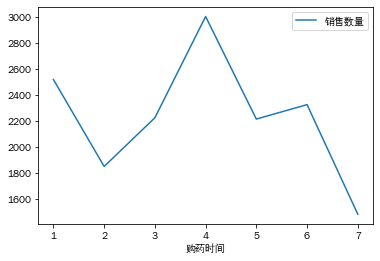

In [9]:
#复制数据框
groupDF = salesDF
groupDF = groupDF.set_index('购药时间')

#新建月度销售数据框
monthsalesDF = groupDF.groupby(groupDF.index.month).sum()
#添加实收金额和应收金额差值列
monthsalesDF['优惠金额'] = monthsalesDF['应收金额'] - monthsalesDF['实收金额']
#月度销售量折线图
monthsalesDF.plot(y = '销售数量')
plt.show()

由月度销售量数据可以看出，2月和7月销售量较低，4月销售量达到高峰，其他月份销售量较为稳定。后续继续通过2、4、7月的销售数据查看出现这样趋势的原因。如果通过其他年份的销售数据都呈现类似的趋势，可以在7月份增加药品库存。

- 2月每日药品的销售数量变化趋势

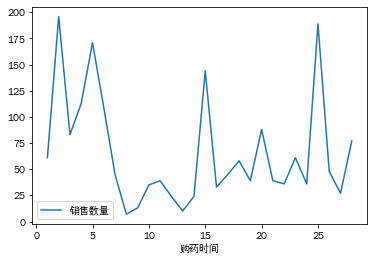

In [10]:
sub2DF = groupDF.loc['2018-02-01':'2018-02-28','销售数量':'实收金额']
month2salesDF =  sub2DF.groupby(sub2DF.index.day).sum()
month2salesDF.plot(y = '销售数量')

plt.show()

从2月每天的药品销售数量可以看出，2月每天的销售数量都处于一个较低mm的水平，可能是因为2月过年假期去医院看病复诊的病人较少。

- 4月每日药品的销售数量变化趋势

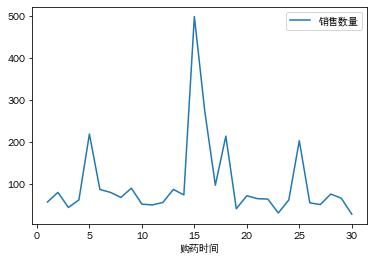

In [11]:
sub4DF = groupDF.loc['2018-04-01':'2018-04-30','销售数量':'实收金额']
month4salesDF =  sub4DF.groupby(sub4DF.index.day).sum()
month4salesDF.plot(y = '销售数量')

plt.show()

从4月药品的销售数据可以看到，4月15日左右销售量出现一个高峰，远高于其他的每日销售量，这可能是4月销售量在前七个月出现高峰的原因。

- 7月每日药品的销售数量变化趋势

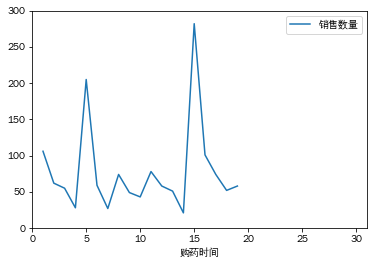

In [12]:
sub7DF = groupDF.loc['2018-07-01':,'销售数量':'实收金额']
month7salesDF =  sub7DF.groupby(sub7DF.index.day).sum()
month7salesDF.plot(y = '销售数量')
plt.axis([0, 31, 0, 300])
plt.show()

通过查看7月的销售数据可以看出7月份的销售数据不全，应该是造成7月销售数量下降的原因。

- 药品月度销售额变化趋势

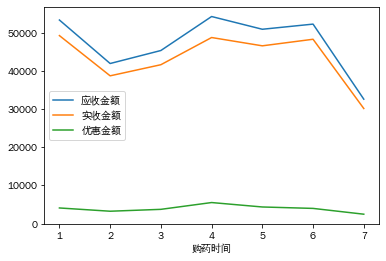

In [13]:
ax1 = monthsalesDF.plot(y = '应收金额', label = '应收金额')
monthsalesDF.plot(ax = ax1, y = '实收金额', label = '实收金额')
monthsalesDF.plot(ax = ax1, y = '优惠金额', label = '优惠金额')

plt.show()

从药品月度销售额可以看出，变化趋势和销售量的变化趋势基本相同，变化量不是很明显。优惠金额基本保持一致，在4月份优惠力度微微加大，可能是造成4月销售量增加的原因，因此定价确定之后若比其他时间优惠力度增加可以提前增加库存。

- 客单价月度变化趋势

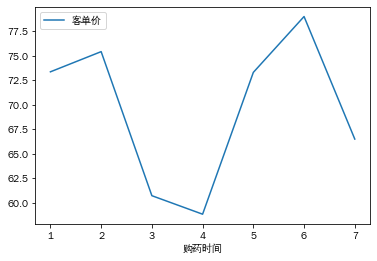

In [14]:
#删除同一天的重复购买记录
kpiTotal_DF = salesDF.drop_duplicates(subset = ['购药时间','社保卡号'])
#计算购买人次
people_month_amount = groupDF.groupby(groupDF.index.month
                                     ).apply(lambda x : x['社保卡号'
                                                         ].drop_duplicates().count())
#计算客单价
monthsalesDF['客单价'] = monthsalesDF['实收金额']/people_month_amount
#客单价折线图
monthsalesDF.plot(y = '客单价')
plt.show()

从客单价趋势可以看出，4月份客单价较低，与之前分析的一致，与销售量增加和优惠力度增大有关。

### 3.1.2 不同类别药品销售存在什么差异

- 药品销售总量与药品销售类别的关系

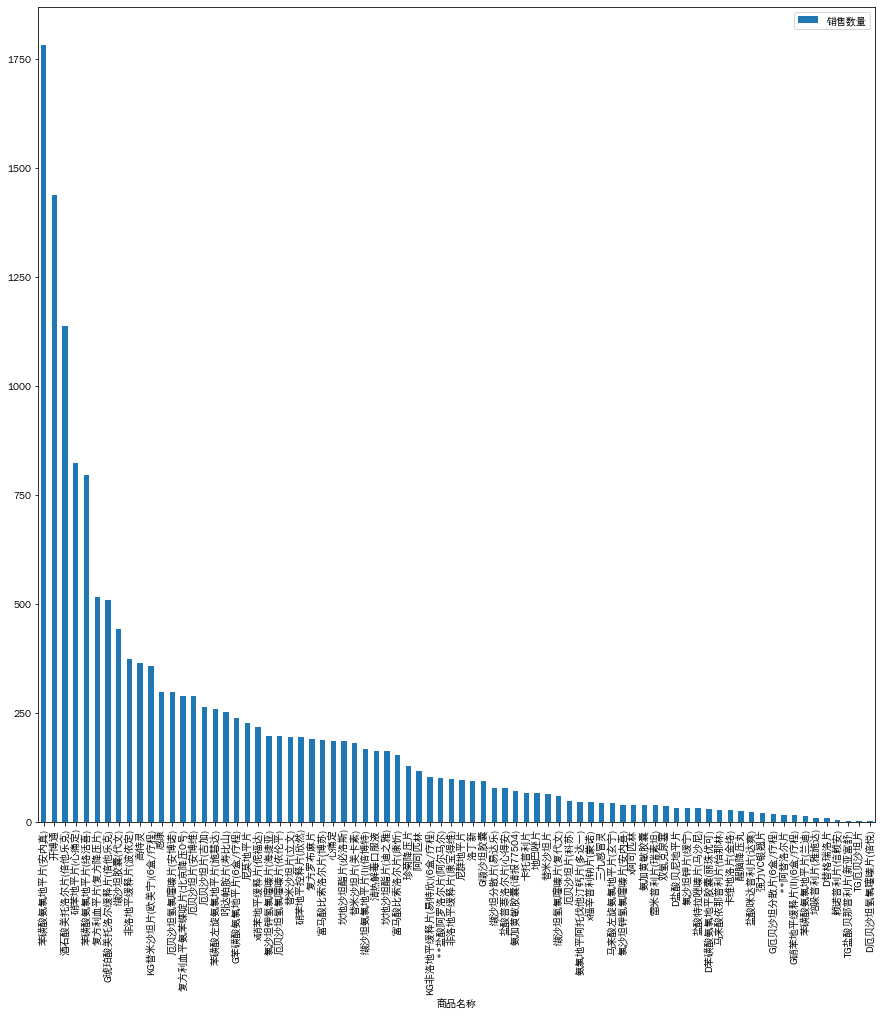

In [15]:
#按照商品名称建立分组并计算累计销售量
drugDF = groupDF.groupby('商品名称').sum()
drugDF = drugDF.sort_values(by = '销售数量', ascending = False)

#绘制不同类别药品销售量柱状图
drugDF.plot(y = '销售数量', kind = 'bar', figsize = (15,15))
plt.show()

从药品销售总量柱状图可以看出，大部分药品前七个月的销售量低于500个，销售量前五的药品（苯磺酸氨氯地平片(安内真)、开博通、酒石酸美托洛尔片(倍他乐克)、硝苯地平片(心痛定)和苯磺酸氨氯地平片(络活喜)）与其他药品累计销量差距较大，同时可以看出销售量较高的药品多属于降压药类等针对慢性病的药品，应该提高这类慢性病的药品库存。针对销售量较少的药品可以降低库存量，降低库存成本。

- 不同类别药品的平均订单销售量

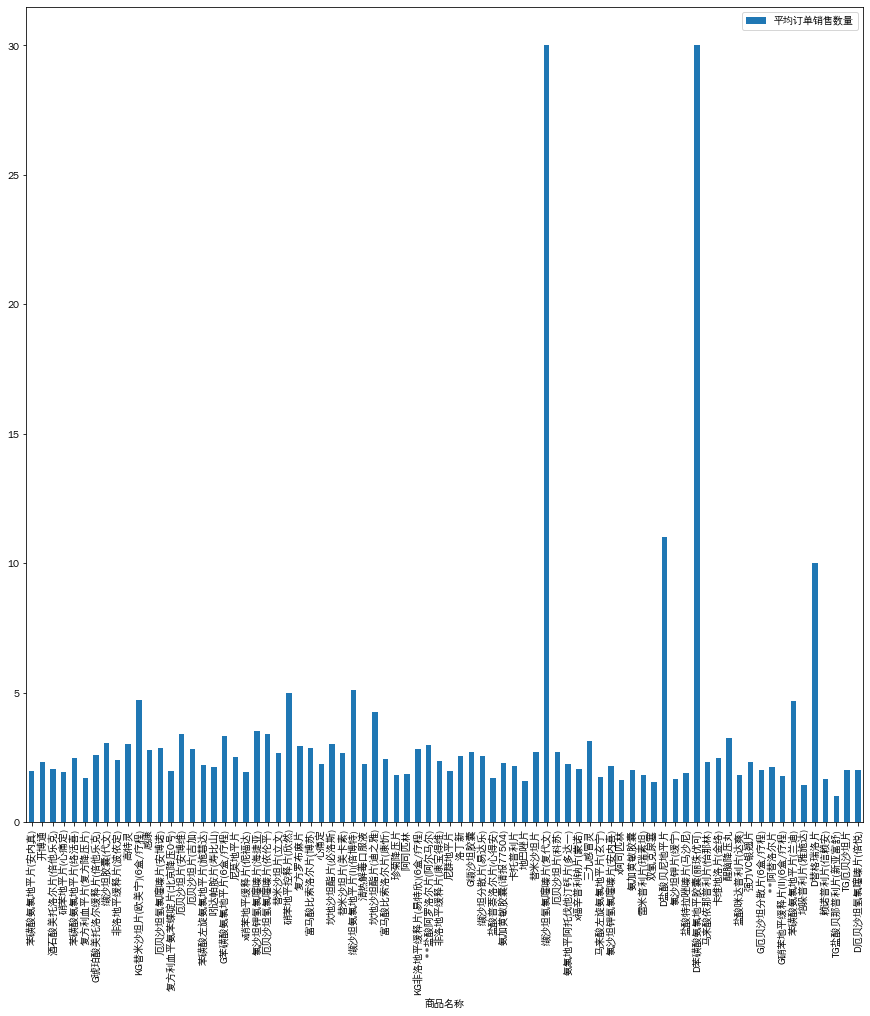

In [16]:
#建立订单数列
drugDF['订单数'] = groupDF.groupby('商品名称').size()
#计算平均订单销量数
drugDF['平均订单销售数量'] = drugDF['销售数量']/drugDF['订单数']
#绘制平均订单销售量
drugDF.plot(y = '平均订单销售数量', kind = 'bar', figsize = (15,15))
plt.show()

从平均订单销量可以看出，大部分药品的平均订单销量都低于5，但缬沙坦氢氯噻嗪片(复代文)和D苯磺酸氨氯地平胶囊(丽珠优可)两类药品虽然整体销售量低，但单笔订单的购买量较大，应该适当调整库存量避免出现同段时期出现多个订单库存不够的情况。

### 3.1.3 不同类别的药品销售情况随时间如何变化

- 不同类别的药品销售总量和时间的关系

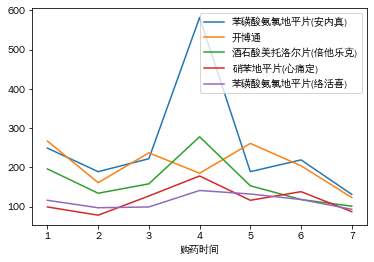

In [17]:
#新建销售量前五的药品数据框
Top1DF = groupDF[groupDF['商品名称']=='苯磺酸氨氯地平片(安内真)']
Top2DF = groupDF[groupDF['商品名称']=='开博通']
Top3DF = groupDF[groupDF['商品名称']=='酒石酸美托洛尔片(倍他乐克)']
Top4DF = groupDF[groupDF['商品名称']=='硝苯地平片(心痛定)']
Top5DF = groupDF[groupDF['商品名称']=='苯磺酸氨氯地平片(络活喜)']

#销售量前五药品的销售数量月度数据
Top1groupDF = Top1DF.groupby(Top1DF.index.month).sum()
Top2groupDF = Top2DF.groupby(Top2DF.index.month).sum()
Top3groupDF = Top3DF.groupby(Top3DF.index.month).sum()
Top4groupDF = Top4DF.groupby(Top4DF.index.month).sum()
Top5groupDF = Top5DF.groupby(Top5DF.index.month).sum()

#绘制销售量前五药品的折线图
ax2 = Top1groupDF.plot(y = '销售数量', label = '苯磺酸氨氯地平片(安内真)')
Top2groupDF.plot(ax = ax2, y = '销售数量', label = '开博通')
Top3groupDF.plot(ax = ax2, y = '销售数量', label = '酒石酸美托洛尔片(倍他乐克)')
Top4groupDF.plot(ax = ax2, y = '销售数量', label = '硝苯地平片(心痛定)')
Top5groupDF.plot(ax = ax2, y = '销售数量', label = '苯磺酸氨氯地平片(络活喜)')

plt.show()

从销售量前五的药品的销售量变化可以看出，药品销售量变化趋势不存在明显的一致性，同时销售量变化较为平稳，四月份苯磺酸氨氯地平片(安内真)销售量出现明显上涨。

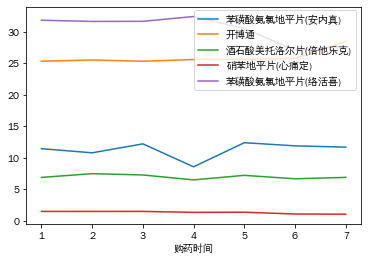

In [18]:
#计算销售量前五的药品单价
Top1groupDF['药品单价'] = Top1groupDF['实收金额']/Top1groupDF['销售数量']
Top2groupDF['药品单价'] = Top2groupDF['实收金额']/Top2groupDF['销售数量']
Top3groupDF['药品单价'] = Top3groupDF['实收金额']/Top3groupDF['销售数量']
Top4groupDF['药品单价'] = Top4groupDF['实收金额']/Top4groupDF['销售数量']
Top5groupDF['药品单价'] = Top5groupDF['实收金额']/Top5groupDF['销售数量']

#绘制销售量前五的药品单价变化折线图
ax3 = Top1groupDF.plot(y = '药品单价', label = '苯磺酸氨氯地平片(安内真)')
Top2groupDF.plot(ax = ax3, y = '药品单价', label = '开博通')
Top3groupDF.plot(ax = ax3, y = '药品单价', label = '酒石酸美托洛尔片(倍他乐克)')
Top4groupDF.plot(ax = ax3, y = '药品单价', label = '硝苯地平片(心痛定)')
Top5groupDF.plot(ax = ax3, y = '药品单价', label = '苯磺酸氨氯地平片(络活喜)')
ax3.legend(loc='right', bbox_to_anchor=(1,0.8),ncol = 1)

plt.show()

从药品单价的变化图可以看出药品单价没有明显的变化趋势，苯磺酸氨氯地平片(安内真)药品单价4月份出现下降，可能是销售量增加的原因。但是苯磺酸氨氯地平片(络活喜)单价在6月份出现下降，但是对比销售量没有出现明显变化。

## 3.2 消费者角度

### 3.2.1 药品复购率


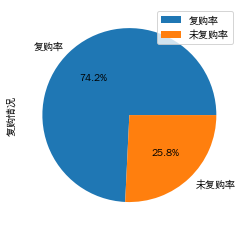

In [19]:
#新建消费次数数据框
timesDF = pd.DataFrame()
timesDF['社保卡号'] = kpiTotal_DF['社保卡号']
timesDF = timesDF.set_index('社保卡号')
#计算每个用户购买次数
timesDF['购买次数'] = timesDF.groupby('社保卡号').size()

#选取出重复购买的用户
querySer1 = timesDF.loc[:,'购买次数']>1
subtimesDF = pd.DataFrame
subtimesDF = timesDF.loc[querySer1,:]

#计算复购率
amounts = timesDF.shape[0]
subamounts = subtimesDF.shape[0]
repeatedrate = subamounts/amounts
singlerate = 1 - repeatedrate
#新建复购率数据框
repeatedDF = pd.DataFrame({'复购情况': [repeatedrate, singlerate],
                         }, index = ['复购率', '未复购率'])

#绘制复购率
repeatedDF.plot(y = '复购情况', kind = 'pie', autopct='%.1f%%')
plt.show()

从复购率可以看出，74.2%的用户存在复购行为，整体来说医院的病患群体较为稳定。

## 四、总结
- 商品销售情况基本稳定，2月出现销售量下降，4月销售量达到顶峰。
- 苯磺酸氨氯地平片(安内真)、开博通、酒石酸美托洛尔片(倍他乐克)、硝苯地平片(心痛定)和苯磺酸氨氯地平片(络活喜)销售总量较高，但缬沙坦氢氯噻嗪片(复代文)和D苯磺酸氨氯地平胶囊(丽珠优可)两类药品单笔订单销售量较高，应根据情况调整库存。
- 不同类别的药品销售量变化趋势没有明显一致性，药品单价变化比较稳定，药品单价可能对药品销量有部分影响，但不具有普遍影响。
- 药品复购率较高，医院病患群体较为稳定。